# Personal Project 
____
**Ainul Marzuki Febri**

## Data: Lending Club

Lending Club is a peer-to-peer lending platform founded in San Francisco in 2006 by Renaud Laplanche. The platform connects borrowers seeking personal or business loans with investors looking to invest in those loans. Borrowers apply for loans online, and investors can choose to fund a portion of various loans to spread the risk. Lending Club enables easier access to credit for borrowers and attractive investment opportunities for investors.

## Our Goal

With historical data on loans and information on whether a borrower defaulted (charge-off) or not, can we build a model that can predict whether a borrower will repay their loan? Thus, in the future when a new prospective customer comes along, we can assess whether they are likely to repay their loan.

## Import Data and Library
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00



# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

----

## Loan Status

In [5]:
df['loan_status'].describe()

count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object

In [6]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [7]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

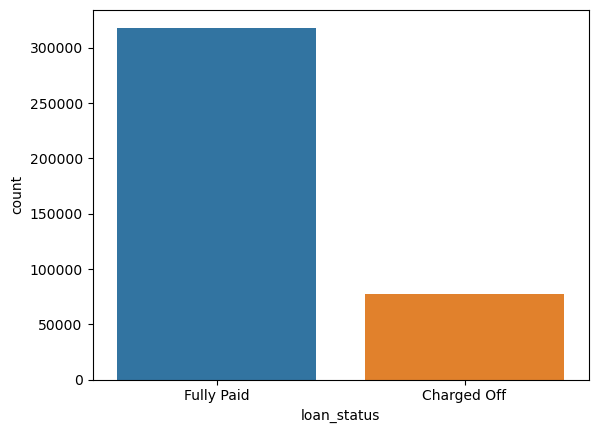

In [8]:
sns.countplot(x='loan_status', data=df)

In [9]:
df['fully_paid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df[['fully_paid','loan_status']]

,fully_paid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


C:\Users\ainul\AppData\Local\Temp\ipykernel_13612\1451095362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], bins=40, kde=False)


<Axes: xlabel='loan_amnt'>

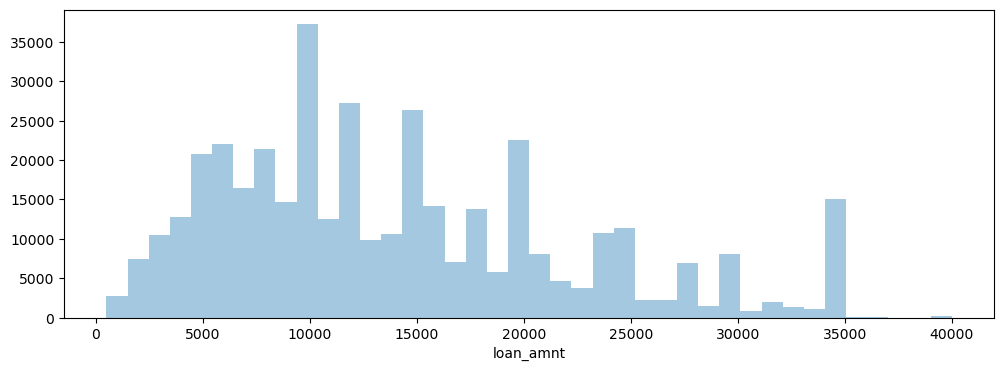

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], bins=40, kde=False)

F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118

<Figure size 4800x4000 with 0 Axes>

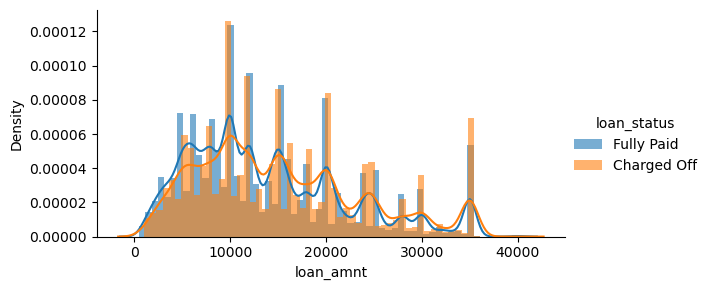

In [11]:
plt.figure(figsize=(12, 10), dpi=400)
g = sns.FacetGrid(df, hue='loan_status', aspect=2)
g.map(sns.distplot, 'loan_amnt', bins=60, hist_kws={'alpha': 0.6})
g.add_legend()
plt.show()

In [12]:
df['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

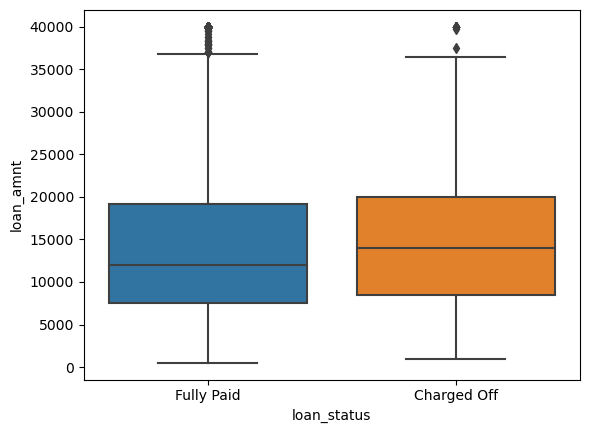

In [13]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


----
It can be seen that there is an imbalance between Fully Paid 80% and Charged Off 20% of the total data. On average, loan status that is charged off has a larger average loan amount than fully paid, which makes sense.

Based on the density plot, we can see that fully paid has a high density compared to charged off in the loan range of 100 to 20000, and vice versa, charged tends to be dense at 20000 and above.

----

## Correlation

<Axes: >

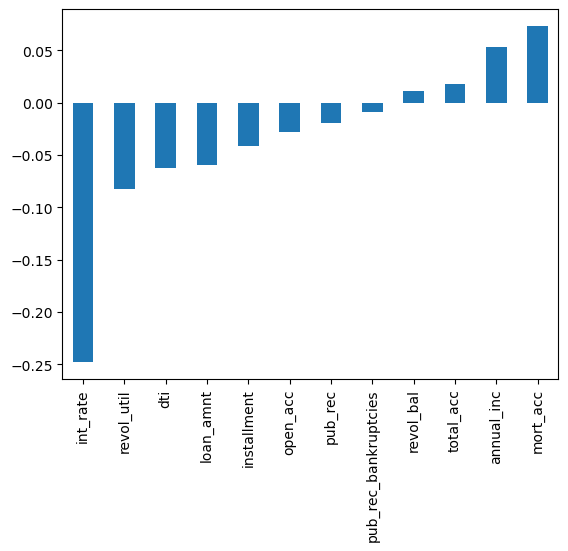

In [15]:
df.corr(numeric_only=True)['fully_paid'].sort_values().drop('fully_paid').plot(kind='bar')

<Axes: >

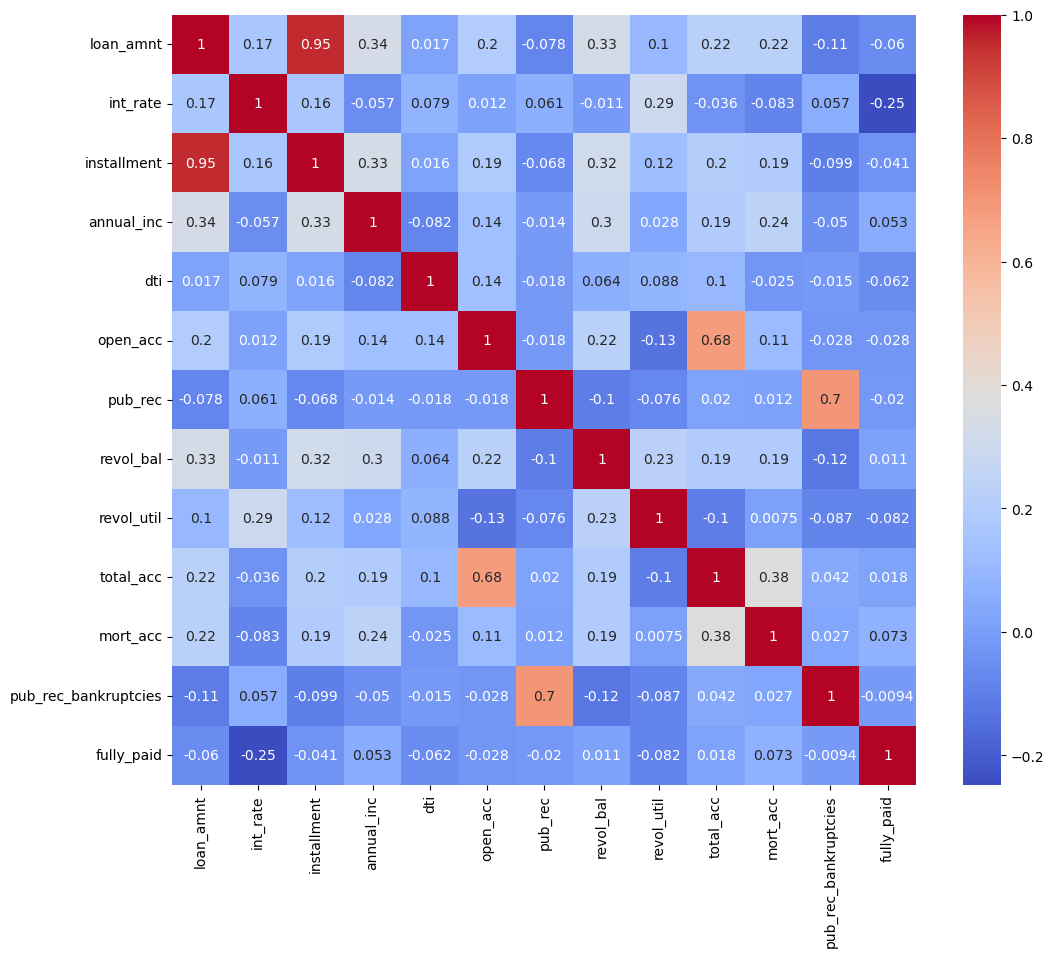

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

Installment and loan amount almost have a perfect correlation close to 1. so we can see how these two features relate, does it make sense?. lets explore those features.

----

## installment vs loan_amnt

<Axes: xlabel='installment', ylabel='loan_amnt'>

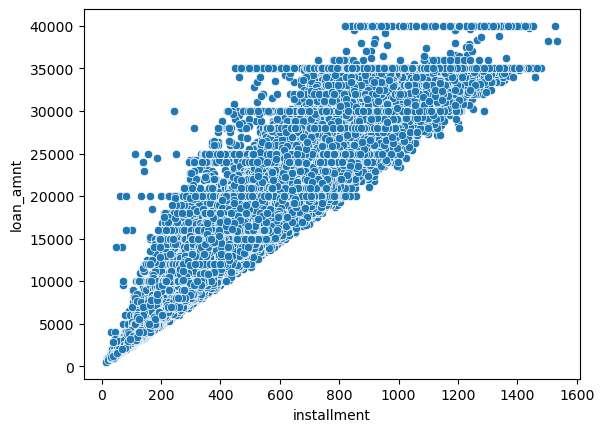

In [17]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


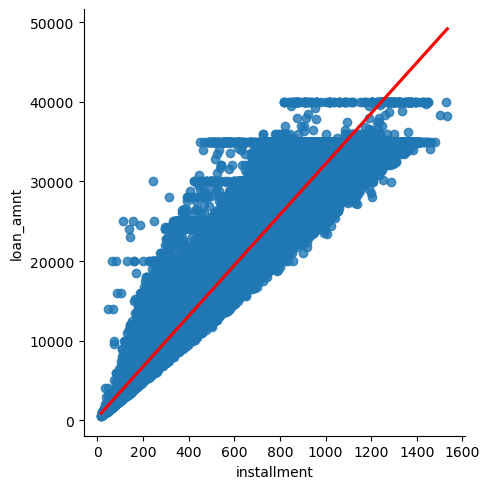

In [18]:
sns.lmplot(x='installment', y='loan_amnt', data=df, line_kws={'color' : 'red'})
plt.show()

Once plotted we can conclude that the two features are positively correlated. any increase in the total loan also increases the number of installments to be paid

----

## Grade
Grade = LC assigned loan grade

In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

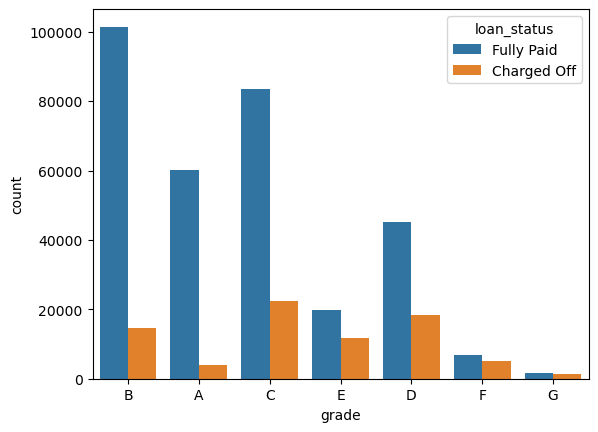

In [21]:
sns.countplot(x='grade', hue='loan_status', data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

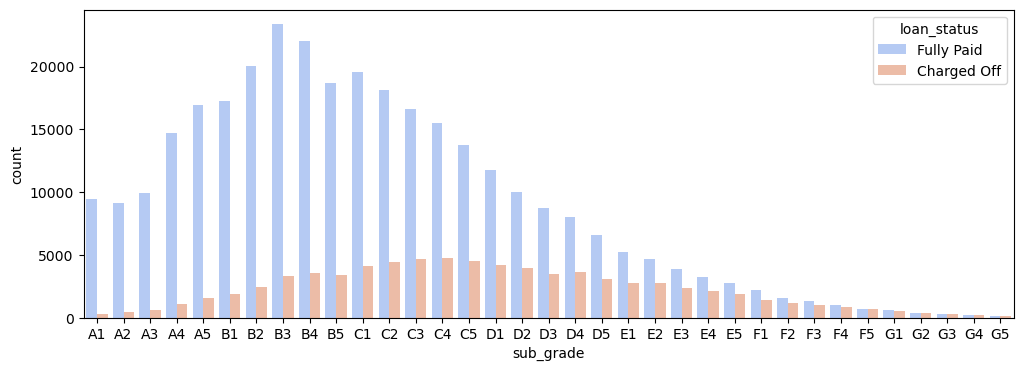

In [22]:
plt.figure(figsize=(12,4))
sorted_subgrade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sorted_subgrade, palette='coolwarm', hue='loan_status' )

<Axes: xlabel='sub_grade', ylabel='count'>

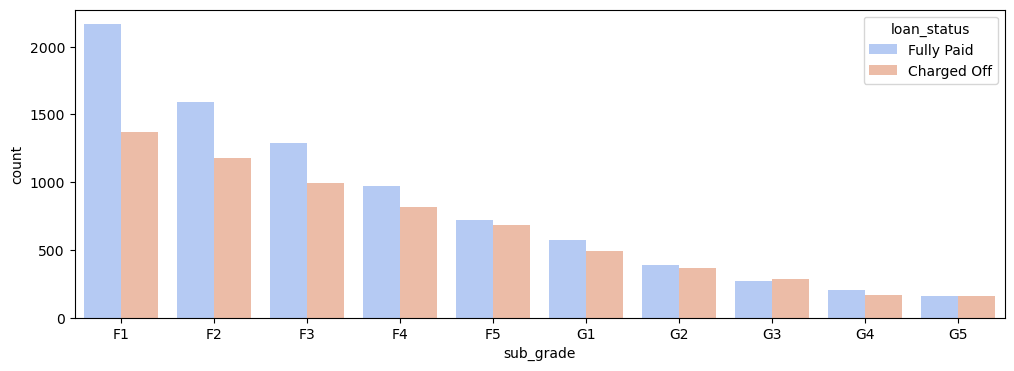

In [23]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
sortedfg = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=sortedfg, palette='coolwarm', hue='loan_status')

# Lowest Grade
## Grade F

In [24]:
df[df['grade']=='F']['loan_status'].value_counts()

loan_status
Fully Paid     6735
Charged Off    5037
Name: count, dtype: int64

In [25]:
loan_status_counts_F = pd.DataFrame(df[df['grade'] == 'F']['loan_status'].value_counts().rename_axis('F'))
loan_status_counts_F.columns = ['count']
total_count = loan_status_counts_F['count'].sum()
loan_status_counts_F['percentage'] = loan_status_counts_F['count']/total_count * 100
loan_status_counts_F

,count,percentage
F,,
Fully Paid,6735,57.212029
Charged Off,5037,42.787971


<Axes: xlabel='F', ylabel='percentage'>

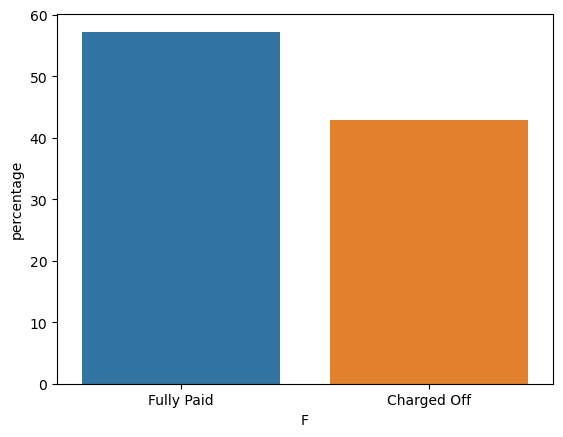

In [26]:
sns.barplot(x=loan_status_counts_F.index, y='percentage', data=loan_status_counts_F)

## Grade G

In [27]:
df[df['grade']=='G']['loan_status'].value_counts()

loan_status
Fully Paid     1593
Charged Off    1461
Name: count, dtype: int64

In [28]:
loan_status_counts_G = pd.DataFrame(df[df['grade'] == 'G']['loan_status'].value_counts().rename_axis('G'))
loan_status_counts_G.columns = ['count']
total_count = loan_status_counts_G['count'].sum()
loan_status_counts_G['percentage'] = loan_status_counts_G['count']/total_count * 100
loan_status_counts_G

,count,percentage
G,,
Fully Paid,1593,52.1611
Charged Off,1461,47.8389


<Axes: xlabel='G', ylabel='percentage'>

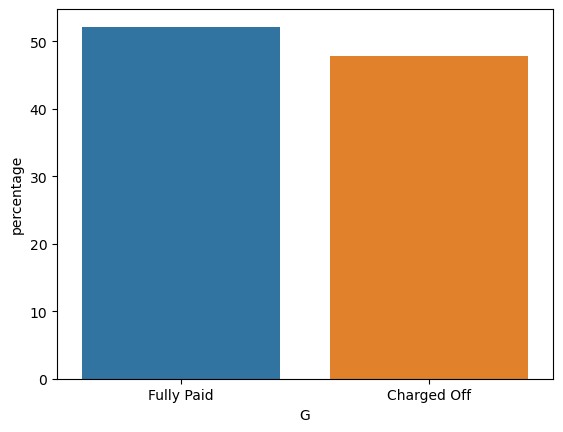

In [29]:
sns.barplot(x=loan_status_counts_G.index, y='percentage', data=loan_status_counts_G)

# Highest Grade
## Grade A and B

In [30]:
loan_status_counts_A = pd.DataFrame(df[df['grade'] == 'A']['loan_status'].value_counts().rename_axis('A'))
loan_status_counts_A.columns = ['count']
total_count = loan_status_counts_A['count'].sum()
loan_status_counts_A['percentage'] = loan_status_counts_A['count']/total_count * 100
loan_status_counts_A

,count,percentage
A,,
Fully Paid,60151,93.712122
Charged Off,4036,6.287878


In [31]:
loan_status_counts_B = pd.DataFrame(df[df['grade'] == 'B']['loan_status'].value_counts().rename_axis('B'))
loan_status_counts_B.columns = ['count']
total_count = loan_status_counts_B['count'].sum()
loan_status_counts_B['percentage'] = loan_status_counts_B['count']/total_count * 100
loan_status_counts_B

,count,percentage
B,,
Fully Paid,101431,87.426951
Charged Off,14587,12.573049


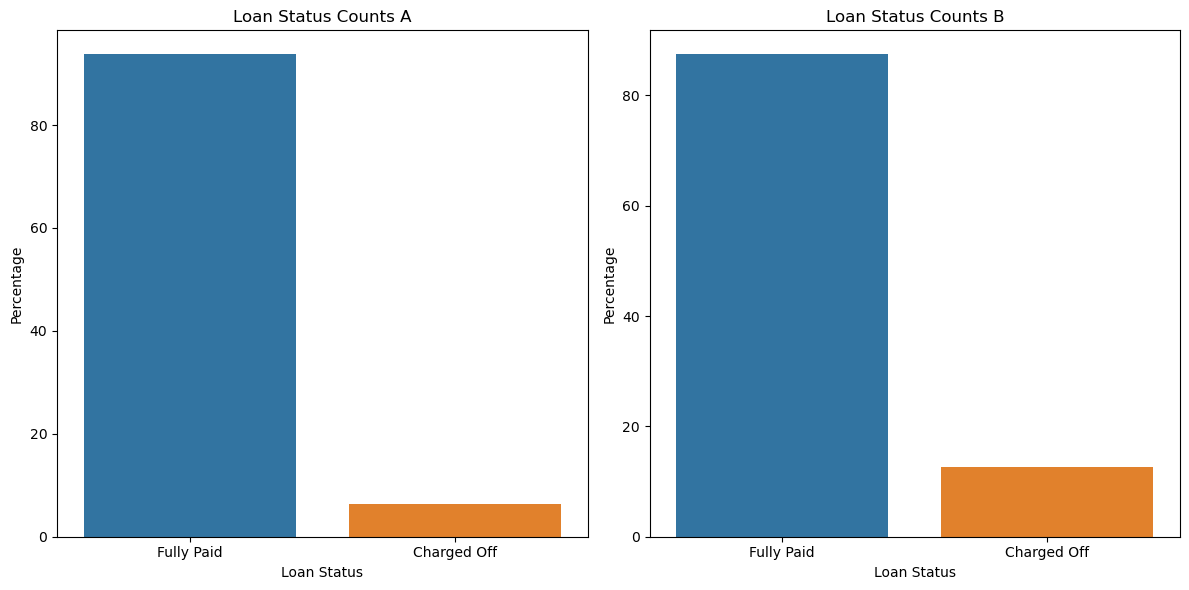

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Barplot pertama
sns.barplot(x=loan_status_counts_A.index, y='percentage', data=loan_status_counts_A.reset_index(), ax=ax1)
ax1.set_title('Loan Status Counts A')
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Percentage')

# Barplot kedua
sns.barplot(x=loan_status_counts_B.index, y='percentage', data=loan_status_counts_B.reset_index(), ax=ax2)
ax2.set_title('Loan Status Counts B')
ax2.set_xlabel('Loan Status')
ax2.set_ylabel('Percentage')

# Menampilkan grafik
plt.tight_layout()
plt.show()

I realize that grades F and G have a thin difference between fully paid and charged off. so we can conclude that in these grades many are constrained to repay the loan. While A and B have a very large difference between fully paid and charged off. So the higher the grade the lower the likelihood of the loan not being paid, and vice versa if the lower the grade the higher the likelihood of the loan not being paid.

----

# Section 2: Data PreProcessing
**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,fully_paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
fully_paid                  0
dtype: int64

In [35]:
len(df)

396030

In [36]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
fully_paid              0.000000
dtype: float64

## emp_title

In [37]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [38]:
df = df.drop('emp_title',axis=1)

emp title is a categorical fetures. The unique fetures reaches 173105 and it is too many to be categorized and will affect the model, so we just drop it.

## emp_length

In [39]:
df['emp_length'].describe()

count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object

In [40]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [41]:
order_emp_legth = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [42]:
df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

<Axes: xlabel='emp_length', ylabel='count'>

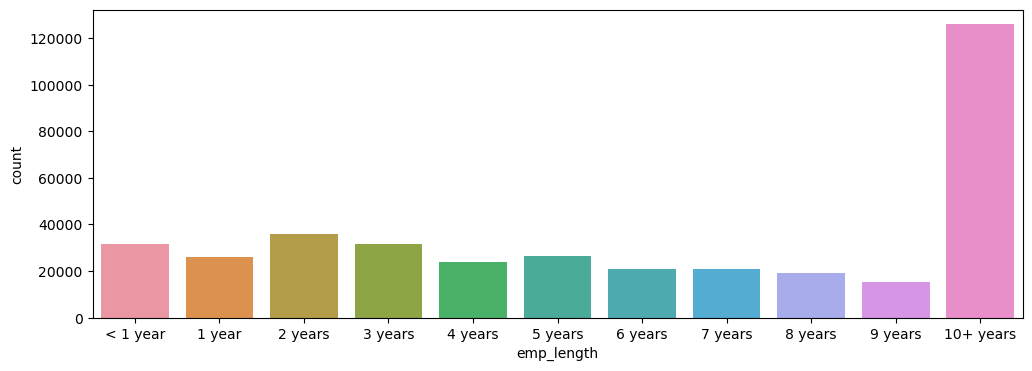

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=order_emp_legth)

In this data, loans are generally made by someone who has worked for more than 10+ years.

<Axes: xlabel='emp_length', ylabel='count'>

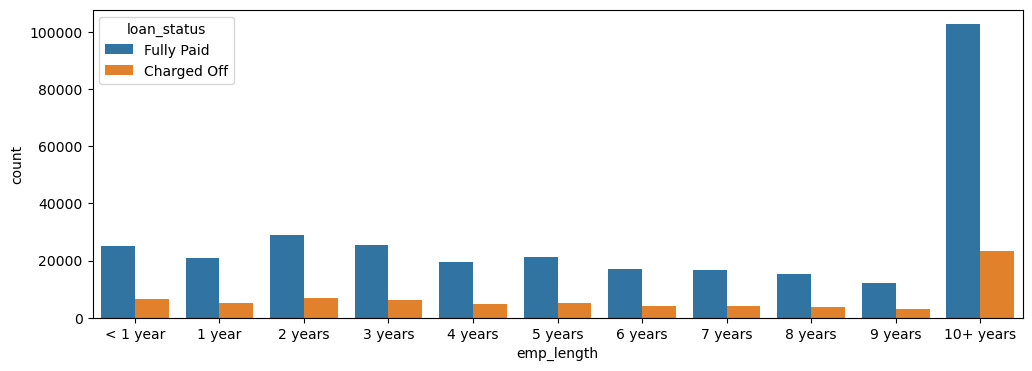

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=order_emp_legth, hue='loan_status')

In [45]:
co_emp = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [46]:
fp_emp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [47]:
emp_ratio_co = co_emp/fp_emp
emp_ratio_co

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

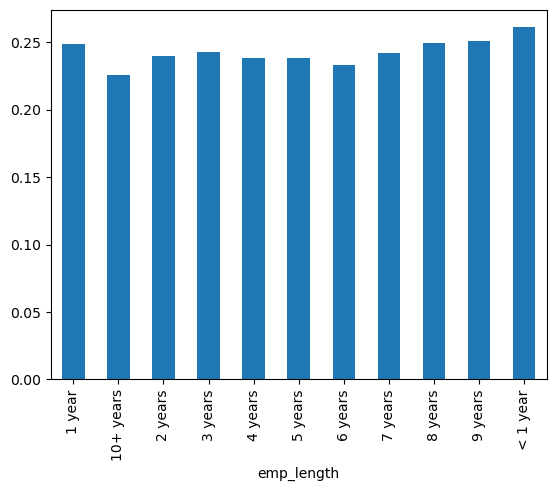

In [48]:
emp_ratio_co.plot(kind='bar')

In [49]:
emp_length_dummies = pd.get_dummies(df['emp_length'],drop_first=True)
emp_length_dummies.columns

Index(['10+ years', '2 years', '3 years', '4 years', '5 years', '6 years',
       '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object')

In [50]:
df = pd.concat([df,emp_length_dummies],axis=1)

In [51]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'fully_paid', '10+ years', '2 years',
       '3 years', '4 years', '5 years', '6 years', '7 years', '8 years',
       '9 years', '< 1 year'],
      dtype='object')

In [52]:
selected_columns = ['fully_paid', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']
selected_df = df[selected_columns]
correlation = pd.DataFrame(selected_df.corr()['fully_paid'][1:])

In [53]:
correlation = correlation.sort_values(by='fully_paid')

<Axes: >

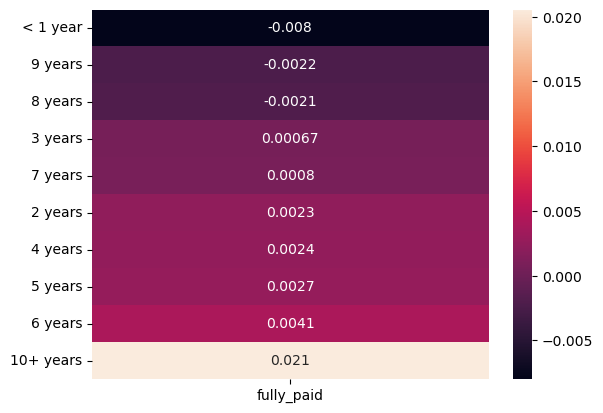

In [54]:
sns.heatmap(correlation, annot=True)

In [55]:
df = df.drop(columns=['emp_length','10+ years', '2 years',
       '3 years', '4 years', '5 years', '6 years', '7 years', '8 years',
       '9 years', '< 1 year'], axis=1)

The results of a brief analysis of the emp_length feature, there are 18301 missing values or 4.6% of the total data and not much information can be obtained from the emp_length feature because the ratio charged off each category is relatively the same, then from the correlation function it also tends not to show significant results on loan_status. In this case, less informative features can be removed to reduce model complexity.

----

## title

In [56]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
fully_paid                  0
dtype: int64

In [57]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [58]:
df = df.drop('title', axis=1)

title is a categorical fetures. The unique fetures reaches 48816 and it is too many to be categorized and will affect the model, so we just drop it

----

## mort_acc

In [59]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
fully_paid                  0
dtype: int64

In [60]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [61]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

C:\Users\ainul\AppData\Local\Temp\ipykernel_13612\2543654976.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mort_acc'], bins=35, kde=False)


<Axes: xlabel='mort_acc'>

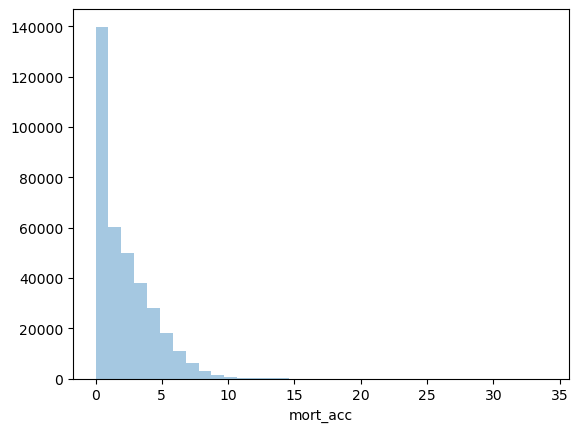

In [62]:
sns.distplot(df['mort_acc'], bins=35, kde=False)

Based on a simple analysis, here I decided to impute the data based on the fetures that are positively correlated with the mort_acc feture. Because the mort_acc data is not normally distributed, so I cannot impute based on the mean of the mort_acc feture because the mean cannot represent the mean of the feture.

<Axes: >

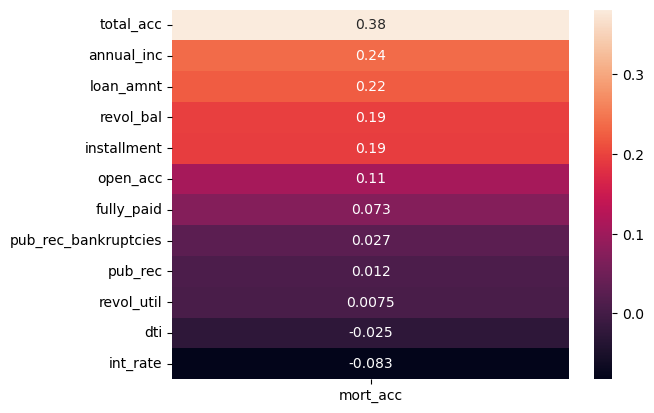

In [63]:
sns.heatmap(pd.DataFrame(df.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values(ascending=False)),annot=True)

In [64]:
df['total_acc'].value_counts()

total_acc
21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: count, Length: 118, dtype: int64

In [65]:
df['total_acc'].describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

C:\Users\ainul\AppData\Local\Temp\ipykernel_13612\242807210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_acc'], bins=35, kde=True)


<Axes: xlabel='total_acc', ylabel='Density'>

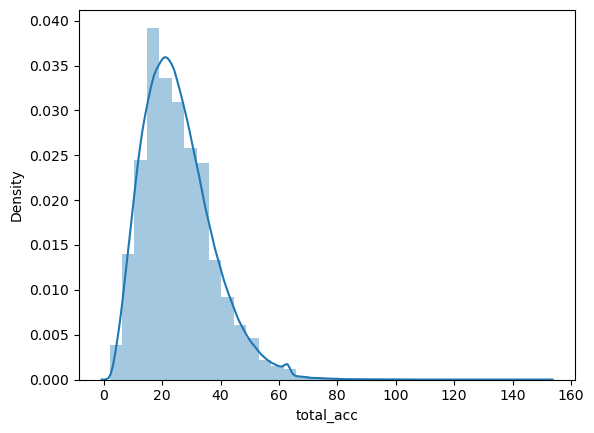

In [66]:
sns.distplot(df['total_acc'], bins=35, kde=True)

total_acc memiliki korelasi positif 0.38 dan datanya terdistribusi secara normal

In [67]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [68]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [69]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [70]:
pd.set_option('display.max_rows', 10)
df['mort_acc'].sort_values().value_counts()

mort_acc
0.000000     139779
1.000000      60416
2.000000      49949
3.000000      38049
4.000000      27887
              ...  
28.000000         1
30.000000         1
3.212389          1
3.176471          1
34.000000         1
Name: count, Length: 110, dtype: int64

---

## revol_util, pub_rec_bankruptcies
**revol_util = 0.06% 
pub_rec_bankruptcies = 0.13%**
because the missing data is too small, here I choose to run the dropna function, because it will not have a significant effect on the dataset.

In [71]:
df = df.dropna()

In [72]:
pd.set_option('display.max_rows', 25)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
fully_paid              0
dtype: int64

---

# Categorical Variables and Dummy Variables
we need to deal with the string values due to the categorical columns.

In [73]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

## term
Convert the term feature into either a 36 or 60 integer numeric data type using .

In [74]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [75]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [76]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

---

## grade

In [77]:
df['grade'].value_counts()

grade
B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: count, dtype: int64

In [78]:
df = df.drop('grade',axis=1)

Since we have subgrade fixtures we will just drop the grade fixtures because it will cause duplication of information.

---

## subgrade
convert subgrade into dummy variabels.

In [79]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
df = df.drop('sub_grade', axis=1)

In [81]:
df = pd.concat([df, subgrade_dummies], axis=1)

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'fully_paid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

---

## home_ownership

In [83]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [84]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [85]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [86]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df,dummies],axis=1)

For the home_ownership feture I reduced the number of categories to only 4, because the categories 'NONE' and 'ANY' were too small in number I just put them in the 'OTHER' category.

---

## verification_status, application_type,initial_list_status,purpose

In [87]:
df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [88]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [89]:
df['initial_list_status'].value_counts()

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [90]:
df['purpose'].value_counts()

purpose
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: count, dtype: int64

In [91]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

In [92]:
df = pd.concat([df, dummies],axis=1)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'fully_paid', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 

---

In [94]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

## issue_d

In [95]:
df['issue_d'].value_counts()

issue_d
Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: count, Length: 112, dtype: int64

In [96]:
df = df.drop('issue_d',axis=1)

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

---

## earliest_cr_line

In [97]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [98]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [99]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [100]:
df = df.drop('earliest_cr_line', axis=1)

This appears to be a historical time stamp feature. Extract the year from this feature, then convert it to a numeric feature.

---

## address

In [101]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'address'], dtype='object')

In [102]:
df['address'].value_counts()

address
USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: count, Length: 392898, dtype: int64

In [103]:
df['zipcode'] = df['address'].apply(lambda address:address[-5:])

In [104]:
df['zipcode'].value_counts()

zipcode
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [105]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)

In [106]:
df = df.drop(['zipcode','address'], axis=1)

In [107]:
df = pd.concat([df,dummies],axis=1)

In [108]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'fully_paid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN',
       'RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'earliest_cr_year', '05113',
 

In the address feture, here I choose to minimize the number of categories by grouping based on the zipcode, which is only 10 zipcodes. Because the whole address cannot be dummy variableized, too many.

---

In [109]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [110]:
df = df.drop('loan_status', axis=1)

# Train Test Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = df.drop('fully_paid',axis=1).values
y = df['fully_paid'].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the Data

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler()

In [116]:
X_train = scaler.fit_transform(X_train)

In [117]:
X_test = scaler.transform(X_test)

# Creating Model

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [119]:
model = Sequential()

In [120]:
model.add(Dense(78,activation='relu'))
model.add(Dense(39,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [121]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [122]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3305 - val_loss: 0.2634
Epoch 2/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2633 - val_loss: 0.2610
Epoch 3/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2625 - val_loss: 0.2594
Epoch 4/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2606 - val_loss: 0.2596
Epoch 5/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2596 - val_loss: 0.2606
Epoch 6/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2593 - val_loss: 0.2604
Epoch 7/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2586 - val_loss: 0.2587
Epoch 8/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2581 - val_loss: 0.2602
Epoch 9/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2585 - val_loss: 0.2590
Epoch 10/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2573 - val_loss: 0.2584
Epoch 11/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2548 - val_loss: 0.2592
Epoch 12/100
1236/1

1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2403 - val_loss: 0.2755
Epoch 68/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2404 - val_loss: 0.2766
Epoch 69/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2389 - val_loss: 0.2777
Epoch 70/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2409 - val_loss: 0.2783
Epoch 71/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2385 - val_loss: 0.2747
Epoch 72/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2392 - val_loss: 0.2771
Epoch 73/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2393 - val_loss: 0.2794
Epoch 74/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2416 - val_loss: 0.2789
Epoch 75/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2393 - val_loss: 0.2799
Epoch 76/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2408 - val_loss: 0.2791
Epoch 77/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2377 - val_loss: 0.2816
Epoch 78/100
1236/1236 

In [123]:
losses = pd.DataFrame(model.history.history)

<Axes: >

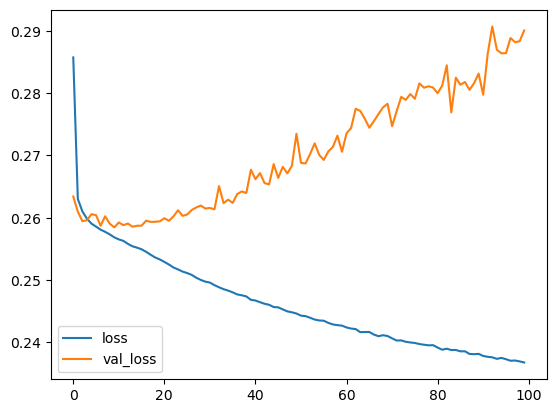

In [124]:
losses[['loss','val_loss']].plot()

This model shows that there is **overfitting**, where validation loss continues to increase while train loss decreases. In the training data, the loss always decreases, but when validated with test data, the error always increases in each epochs, which means that the model becomes **overfitting** because it memorizes too much in the training data. To improve the model I added a drop out , early stopping, ReduceLROnPlateau and more layers.

---

# Recreating Model, add dropout, early stopping, ReduceLROnPlateau and more layers

- **EarlyStopping** is a callback used to stop the model training early if the monitored metric does not show improvement within a few consecutive epochs.
- **ReduceLROnPlateau** is a callback used to reduce the learning rate when the monitored metric stops improving.
- **Dropout** Dropout is a regulation technique in artificial neural networks that prevents overfitting by randomly "dropping" (deactivating) a number of units (neurons) in a layer during training.

In [125]:
model = Sequential()

In [126]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

In [127]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [128]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [129]:
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stop, reduce_lr])

Epoch 1/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8383 - loss: 0.3846 - val_accuracy: 0.8889 - val_loss: 0.2621 - learning_rate: 0.0010
Epoch 2/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8876 - loss: 0.2704 - val_accuracy: 0.8889 - val_loss: 0.2610 - learning_rate: 0.0010
Epoch 3/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8876 - loss: 0.2655 - val_accuracy: 0.8889 - val_loss: 0.2621 - learning_rate: 0.0010
Epoch 4/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8889 - loss: 0.2619 - val_accuracy: 0.8889 - val_loss: 0.2601 - learning_rate: 0.0010
Epoch 5/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8879 - loss: 0.2625 - val_accuracy: 0.8889 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 6/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8884 - loss: 0.2608 - val_accuracy: 0.8889 - val_loss: 0.2593 - learning_rate: 0.0010
Epoch 7/100
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8

# Section 3: Evaluating Model Performance.

In [130]:
losses = pd.DataFrame(model.history.history)

<Axes: >

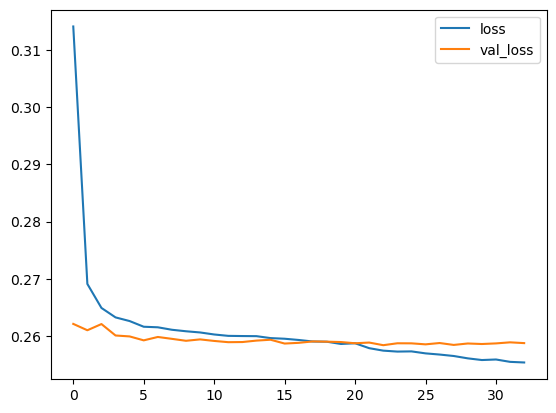

In [131]:
losses[['loss','val_loss']].plot()

After adding the callback function to optimize the monitoring of model training, graphically we can see that the training data loss and validation data loss overlap or coincide, which does not indicate **overfitting** or **underfitting**.

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 685us/step


In [134]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [136]:
confusion_matrix(y_test,predictions)

array([[ 6736,  8685],
       [   70, 63553]], dtype=int64)

In [137]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_df

,Predicted 0,Predicted 1
Actual 0,6736,8685
Actual 1,70,63553


In [138]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [139]:
pd.DataFrame(history.history['accuracy'][-1:]).sort_values(by = 0, ascending=False)

,0
0,0.88921


In [140]:
pd.DataFrame(history.history['val_accuracy'][-1:]).sort_values(by = 0, ascending=False)

,0
0,0.888821


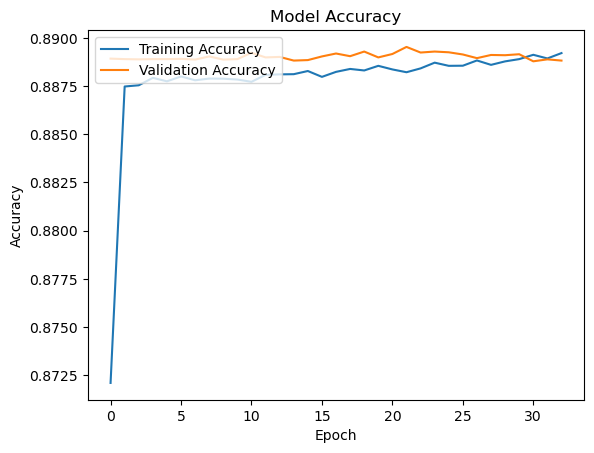

In [141]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

-- **Class 0**: The model has very high precision (0.99) but low recall (0.44), indicating that the model rarely makes mistakes when predicting class 0, but often misses class 0 events. From this, we can conclude that although the model rarely makes mistakes when predicting class 0 (high precision), it misses most of the examples that actually belong to class 0 (low recall). F1-score is the harmonic mean of precision and recall. Despite the high precision, due to the low recall, the F1-score is still quite low. This suggests that although the model has high precision, it may not be effective overall in predicting class 0 well, especially in finding all examples that actually belong to class 0.

-- **Class 1**: The model has perfect recall (1.00), meaning all class 1 events are detected, but slightly lower precision (0.88), indicating there are some errors in predicting class 1. From this, we can conclude that the model has excellent performance in predicting class 1, with high precision and perfect recall. This shows that the model rarely makes mistakes when predicting class 1, and at the same time, it successfully identifies all examples that actually belong to class 1. F1-score is the harmonic mean of precision and recall. With high precision and perfect recall, F1-score reflects the excellent performance of the model in predicting class 1.

-- **Accuracy**: 89%, indicating that the model is quite good overall.

# Saving model

In [142]:
from tensorflow.keras.models import load_model

model.save('model_keras_lending_club.h5')  

# Example of using the model
**TASK: Given the customer below, would you offer this person a loan?**

In [143]:
import random

In [144]:
random.seed(43)
random_ind = random.randint(0,len(df))

In [145]:
random_ind

20212

Here we take 1 individual data randomly from the entire data which is used as a new customer variable to be predicted using the model that we have made before.

In [146]:
new_customer = df.drop('fully_paid',axis=1).iloc[random_ind]
pd.DataFrame(new_customer)

,20253
loan_amnt,7000.0
term,36
int_rate,8.9
installment,222.28
annual_inc,47000.0
...,...
30723,False
48052,True
70466,False
86630,False


In [147]:
loaded_model = tf.keras.models.load_model('model_keras_lending_club.h5')

In [148]:
# Ubah numpy array menjadi tensor
new_customer_tensor = tf.convert_to_tensor(new_customer.values.reshape(1, -1), dtype=tf.float32)

# Lakukan prediksi dengan model yang dimuat
predictions = (loaded_model.predict(new_customer_tensor) > 0.5).astype("int32")
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[1]])

Predicted based on the model, this customer is **fully paid or repays the loan (1)**

Now check, did this person actually end up paying back their loan?

In [149]:
df.iloc[random_ind]['fully_paid']

1

Based on the data, **new customers repay their loans**

# Conclusion

This project successfully built a binary classification model to predict whether loans in Lending Club will be fully paid (class 1) or charged off (class 0) with 89% accuracy. Through the stages of data exploration, preprocessing (addressing missing data and handling categorical variables), and overfitting using techniques such as dropout and early stopping, the model showed excellent performance in detecting fully paid loans (class 1) with perfect recall (1.00) and high precision (0.88). However, the model had difficulty in detecting charged off loans (class 0) with a low recall (0.44), despite a very high precision (0.99). This suggests that while the model is effective in predicting fully paid loans, further improvements are needed to enhance the detection of charged off loans.

Recommendations for further improvement include:
- Balancing the dataset if there is an imbalance between classes.
- Exploration of additional features that can help detect class 0 better.
- Using oversampling or undersampling techniques to overcome class imbalance.

# Thank You